In [43]:
# -*- coding: utf-8 -*-
"""
Notebook 2: Análisis de datos. Descriptivo y exploratorio (Tema 2)
Este Notebook recopila los conceptos clave del tema aplicados al dataset de vino.
Contenido: Cuarteto de Anscombe, Tipos de variables, Distribuciones, Outliers y Correlación.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
#df = pd.read_csv(url, sep=';')
df = pd.read_csv(url, sep=';',usecols=[10,1,2,0])
df.info()

print("--- Primeras filas del dataset ---")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     1599 non-null   float64
 1   volatile acidity  1599 non-null   float64
 2   citric acid       1599 non-null   float64
 3   alcohol           1599 non-null   float64
dtypes: float64(4)
memory usage: 50.1 KB
--- Primeras filas del dataset ---
   fixed acidity  volatile acidity  citric acid  alcohol
0            7.4              0.70         0.00      9.4
1            7.8              0.88         0.00      9.8
2            7.8              0.76         0.04      9.8
3           11.2              0.28         0.56      9.8
4            7.4              0.70         0.00      9.4


Axes(0.125,0.11;0.775x0.77)


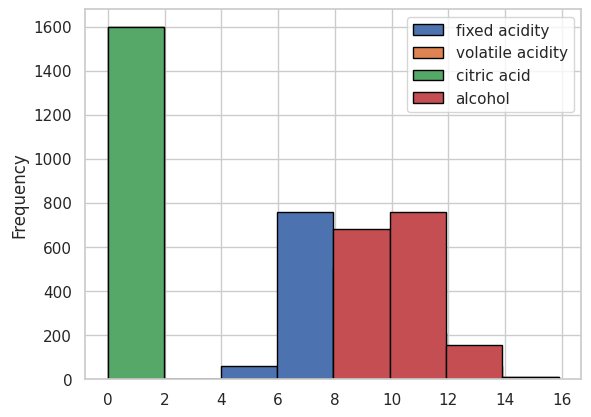

In [44]:
histogram = df.plot.hist(bins= 8, edgecolor='black')
print(histogram)

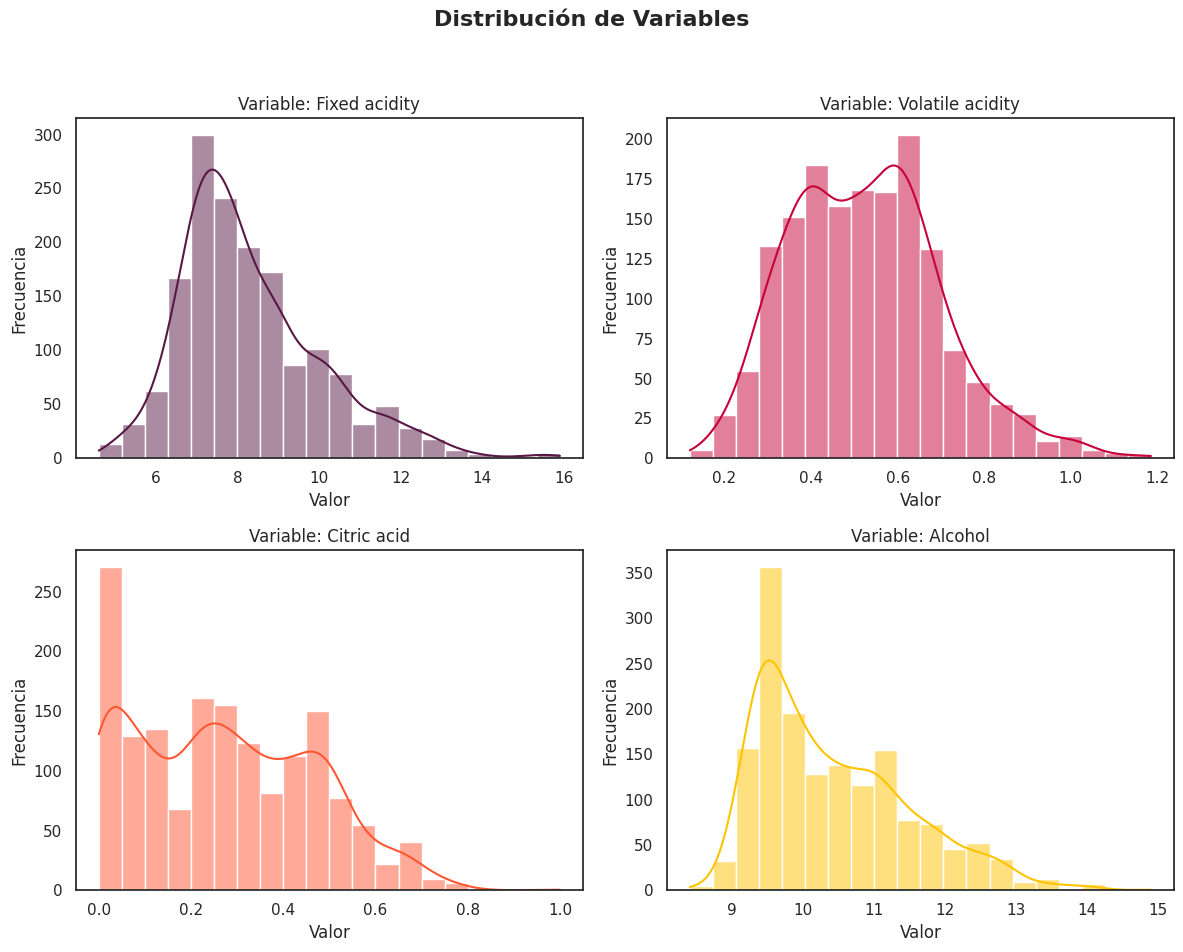

In [45]:
# 2. Limpieza básica (siguiendo el criterio del notebook para volatile acidity)
df = df[df['volatile acidity'] < 1.2]

# 3. Configuración del "Canvas" de visualización
sns.set_theme(style="white")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribución de Variables', fontsize=16, fontweight='bold')

# Lista de colores para diferenciar las variables
colores = ['#581845', '#C70039', '#FF5733', '#FFC300']

# 4. Generación automática de los histogramas
for i, col in enumerate(df.columns):
    row, loc = divmod(i, 2)
    sns.histplot(df[col], kde=True, ax=axes[row, loc], color=colores[i], bins=20)
    axes[row, loc].set_title(f'Variable: {col.capitalize()}', fontsize=12)
    axes[row, loc].set_xlabel('Valor')
    axes[row, loc].set_ylabel('Frecuencia')

# Ajustar el diseño para que no se solapen los títulos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [46]:
print("--- Rangos Intercuartílicos (IQR) ---")
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Variable: {col}\n  Q1 (25%): {Q1:.2f}\n  Q3 (75%): {Q3:.2f}\n  IQR: {IQR:.2f}\n")

--- Rangos Intercuartílicos (IQR) ---
Variable: fixed acidity
  Q1 (25%): 7.10
  Q3 (75%): 9.20
  IQR: 2.10

Variable: volatile acidity
  Q1 (25%): 0.39
  Q3 (75%): 0.64
  IQR: 0.25

Variable: citric acid
  Q1 (25%): 0.09
  Q3 (75%): 0.42
  IQR: 0.33

Variable: alcohol
  Q1 (25%): 9.50
  Q3 (75%): 11.10
  IQR: 1.60



### Visualización de Rangos Intercuartílicos con Box Plots

Los diagramas de caja (box plots) son una excelente herramienta para visualizar la distribución de una variable numérica, incluyendo sus cuartiles y la presencia de posibles *outliers* (valores atípicos).

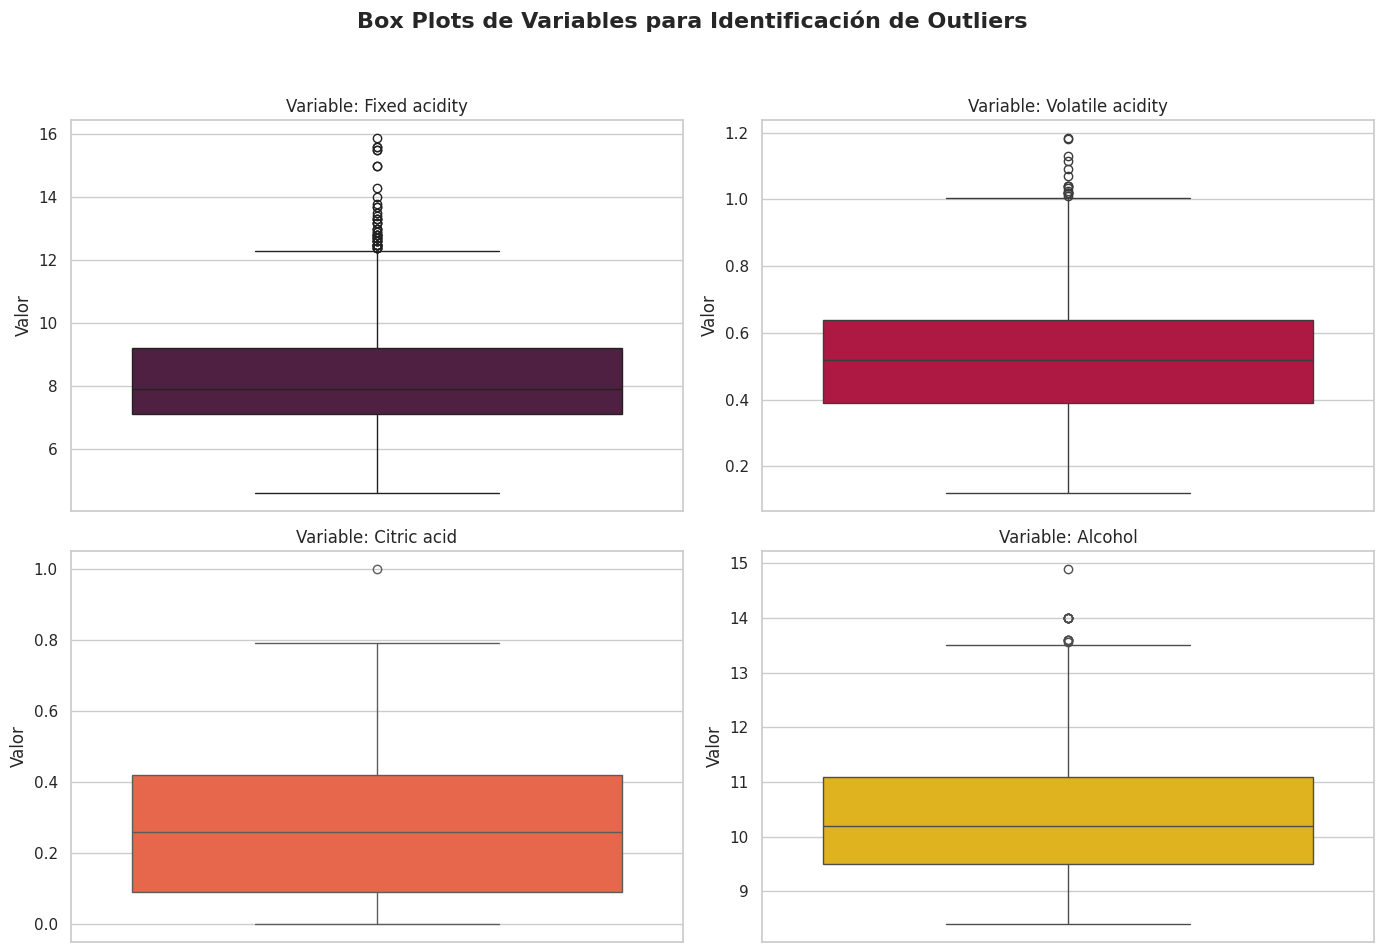

In [47]:

# Configuración del "Canvas" de visualización para los box plots
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Box Plots de Variables para Identificación de Outliers', fontsize=16, fontweight='bold')

colores = ['#581845', '#C70039', '#FF5733', '#FFC300'] # Reutilizamos los colores si se desea consistencia

# Generación automática de los box plots
for i, col in enumerate(df.columns):
    row, loc = divmod(i, 2)
    sns.boxplot(y=df[col], ax=axes[row, loc], color=colores[i % len(colores)])
    axes[row, loc].set_title(f'Variable: {col.capitalize()}', fontsize=12)
    axes[row, loc].set_ylabel('Valor')

# Ajustar el diseño para que no se solapen los títulos y etiquetas
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

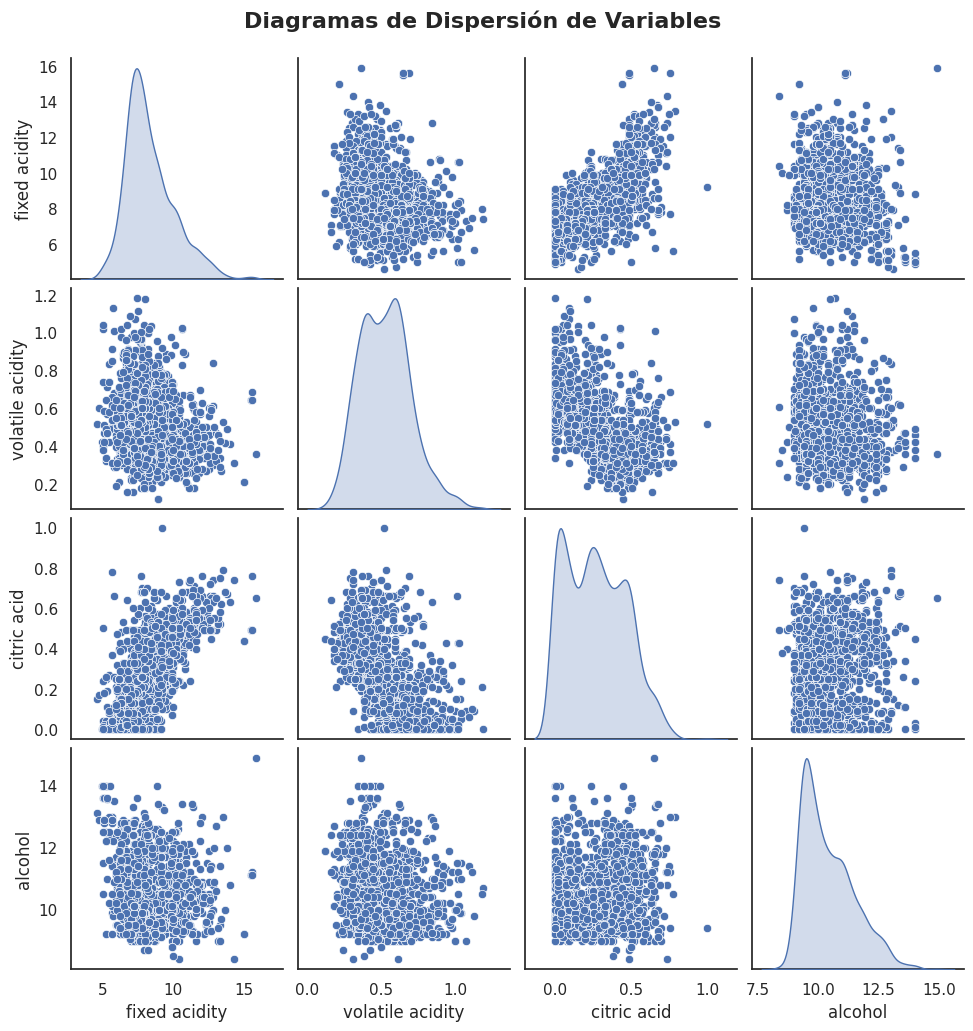

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del "Canvas" de visualización para los diagramas de dispersión
sns.set_theme(style="white")

# Generación de los diagramas de dispersión para todas las combinaciones de variables
# El pairplot muestra la distribución univariante en la diagonal y la relación bivariante fuera de ella.
fig = sns.pairplot(df, diag_kind='kde')
fig.fig.suptitle('Diagramas de Dispersión de Variables', fontsize=16, fontweight='bold', y=1.03)

plt.show()

In [53]:
from sklearn.datasets import load_iris
import pandas as pd

# 1. Load the Iris dataset
iris = load_iris()

# 2. Identify the index for 'setosa' species
setosa_index = list(iris.target_names).index('setosa')

# 3. Filter the data to include only 'setosa' observations
df_setosa = pd.DataFrame(iris.data[iris.target == setosa_index], columns=iris.feature_names)

print("--- Primeras filas del DataFrame de Iris filtrado para 'setosa' ---")
print(df_setosa.head())

--- Primeras filas del DataFrame de Iris filtrado para 'setosa' ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [54]:
print("--- Estadísticas Descriptivas para las características de Iris 'setosa' ---")
print(df_setosa.describe())

--- Estadísticas Descriptivas para las características de Iris 'setosa' ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  


### Visualización de Dispersión y Correlaciones para Iris Setosa con Pair Plot

Para visualizar la dispersión de cada característica de Iris Setosa y las correlaciones entre ellas, utilizaremos un `pairplot`. Este gráfico nos mostrará las distribuciones univariadas en la diagonal y los diagramas de dispersión bivariados fuera de la diagonal.

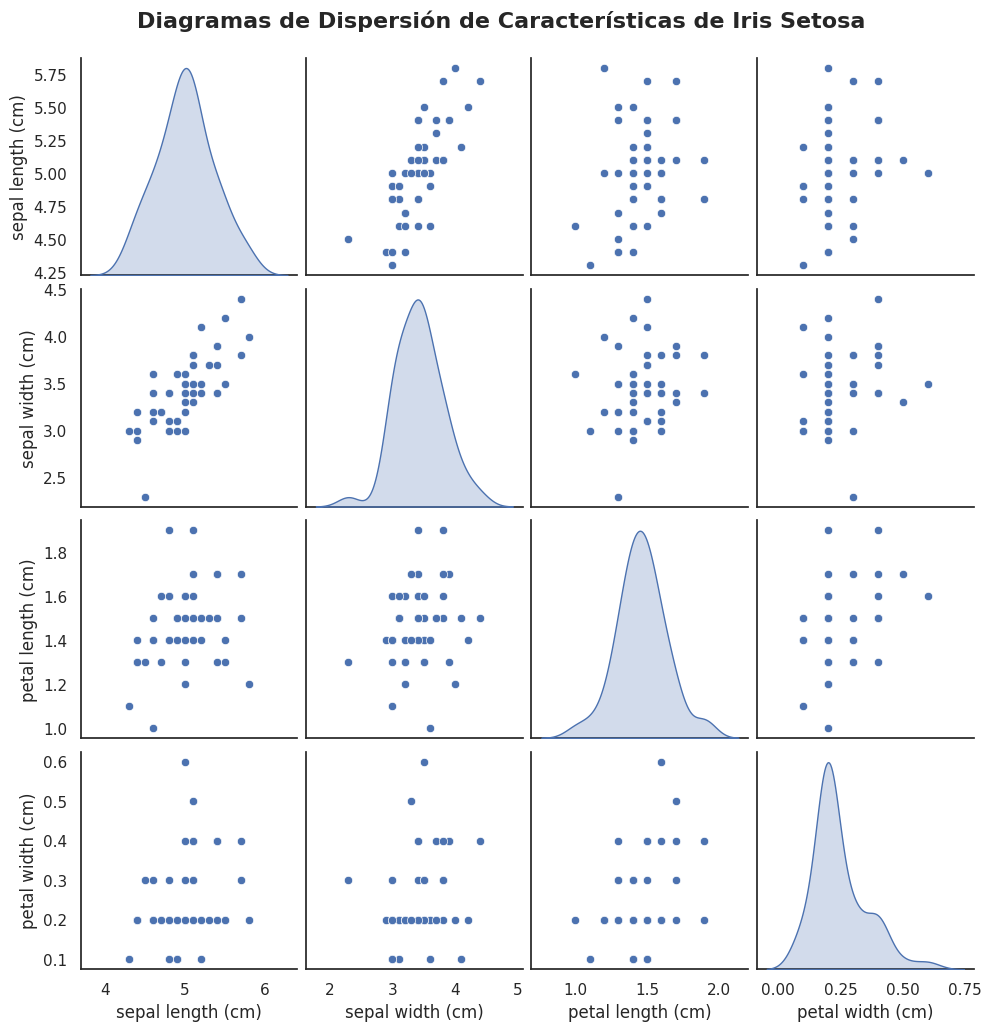

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

# Generar el pairplot para df_setosa
fig = sns.pairplot(df_setosa, diag_kind='kde')
fig.fig.suptitle('Diagramas de Dispersión de Características de Iris Setosa', fontsize=16, fontweight='bold', y=1.03)

plt.show()

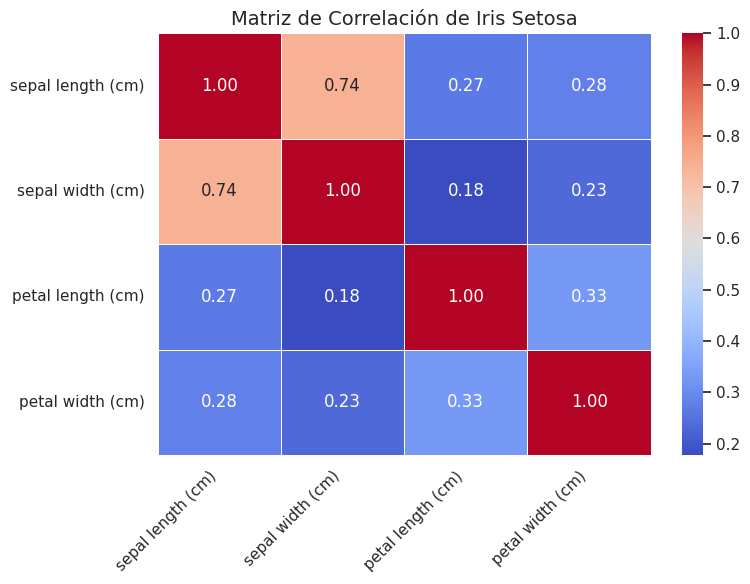

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular la matriz de correlación
correlation_matrix = df_setosa.corr()

# 2. Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Iris Setosa', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# 3. Mostrar el mapa de calor
plt.show()

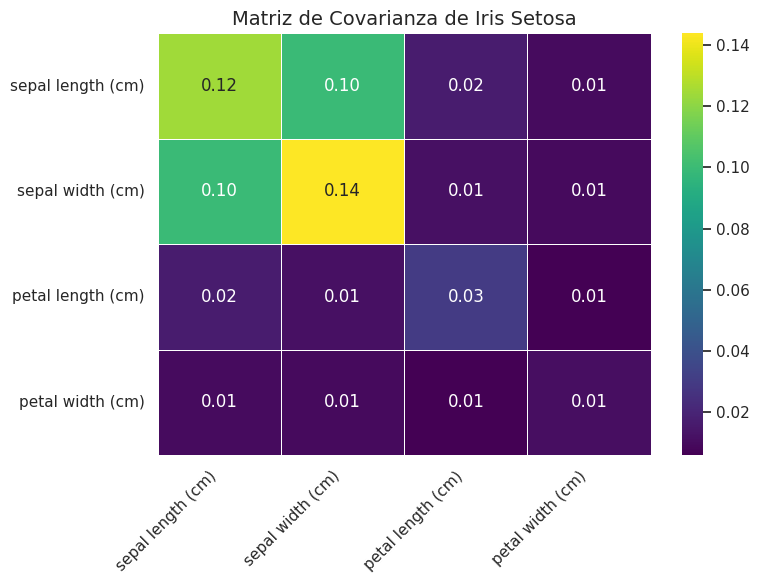

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular la matriz de covarianza
covariance_matrix = df_setosa.cov()

# 2. Visualizar la matriz de covarianza usando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Matriz de Covarianza de Iris Setosa', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# 3. Mostrar el mapa de calor
plt.show()